In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.metrics import mean_squared_error
from math import sqrt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.graphics.tsaplots import plot_acf
import numpy as np

In [2]:
df = pd.read_csv("C:/Users/chris/Documents/Senior_Project/CT_SeniorProject/CrashData_Repo1/data/interim/filtered_dataset.csv")

In [3]:
# Return a table of the number of crashes by year, excluding 
crashes_by_year = df[~df['CRASH_YEAR'].isin([2013, 2014,2015,2016,2017,2025])].groupby('CRASH_YEAR').size().reset_index(name='CRASH_COUNT')
crashes_by_year

,CRASH_YEAR,CRASH_COUNT
0,2018,118950
1,2019,117762
2,2020,92094
3,2021,108765
4,2022,108410
5,2023,110747
6,2024,112006


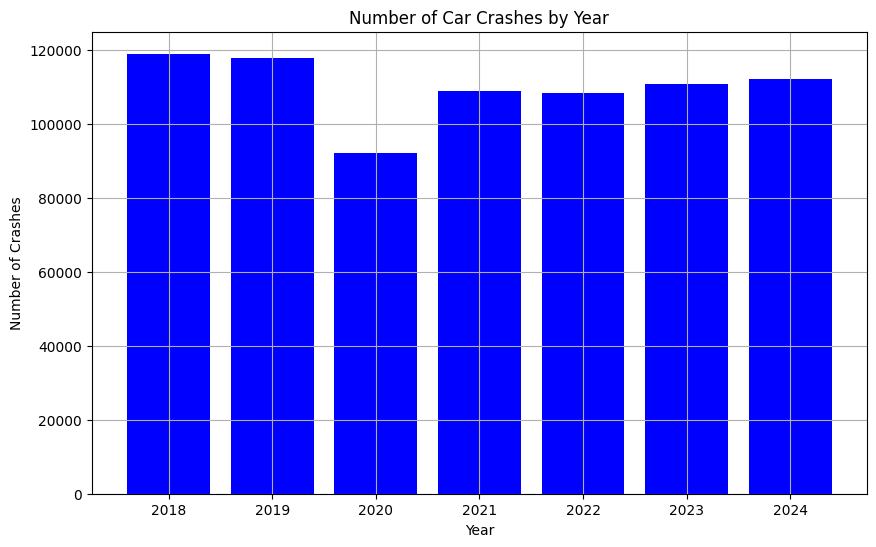

In [8]:
plt.figure(figsize=(10, 6))
plt.bar(crashes_by_year['CRASH_YEAR'], crashes_by_year['CRASH_COUNT'], color='blue')
plt.title('Number of Car Crashes by Year')
plt.xlabel('Year')
plt.ylabel('Number of Crashes')
plt.grid(True)
plt.show()

In [9]:
#how many crashes per day? min, max, mean, median, std
crashes_by_day = df.groupby('CRASH_DATE').size().reset_index(name='CRASH_COUNT')
crashes_by_day.describe()


,CRASH_COUNT
count,2557.000000
mean,300.639030
std,56.310132
min,85.000000
25%,266.000000
50%,303.000000
75%,336.000000
max,583.000000


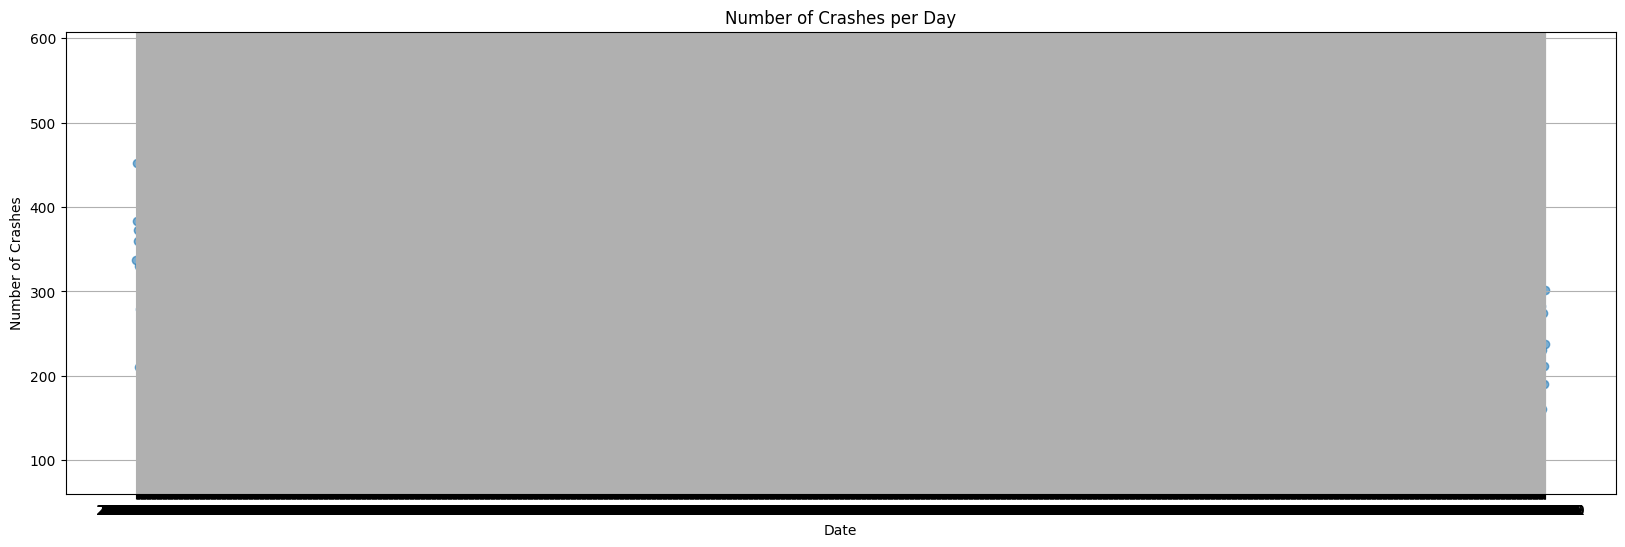

In [13]:
# Create the scatter plot
plt.figure(figsize=(20, 6))
plt.scatter(crashes_by_day['CRASH_DATE'], crashes_by_day['CRASH_COUNT'], alpha=0.6)
plt.title('Number of Crashes per Day')
plt.xlabel('Date')
plt.ylabel('Number of Crashes')
plt.grid(True)
plt.show()